In [871]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

#read file
filename='/Users/alex/Documents/Work/BASIS/ftx_mango_funding_rates.parquet'
df_data = pd.read_parquet(filename, engine='pyarrow') 
col_numeric=['funding_rate_normalized', 'funding_rate','apr', 'apy', 'volume', 'open_interest_usd_normalized','volume_usd_normalized']
df_data[col_numeric] = df_data[col_numeric].apply(pd.to_numeric, errors='coerce')

In [872]:
df_data

tardis_id exchange  funding_rate_normalized  \
timestamp                                                          
2022-03-02 13:00:00   BTC-PERP    mango                0.0000003   
2022-03-02 13:00:00   ETH-PERP    mango                0.0000026   
2022-03-02 13:00:00   FTT-PERP    mango               -0.0000199   
2022-03-02 13:00:00  LUNA-PERP    mango               -0.0000274   
2022-03-02 13:00:00   SOL-PERP    mango                0.0000056   
...                        ...      ...                      ...   
2022-04-19 13:00:00   BTC-PERP      ftx               -0.0000010   
2022-04-19 13:00:00   FTT-PERP      ftx               -0.0000200   
2022-04-19 13:00:00   ETH-PERP      ftx               -0.0000070   
2022-04-19 13:00:00   SOL-PERP      ftx               -0.0000050   
2022-04-19 13:00:00  LUNA-PERP      ftx               -0.0000160   

                     funding_rate        apr        apy              volume  \
timestamp                                                                     
2022-03-02 13:00:00     0.0000003  0.0027258  0.0027296           3.3729000   
2022-03-02 13:00:00     0.0000026  0.0226377  0.0228959          34.4400000   
2022-03-02 13:00:00    -0.0000199 -0.1740328 -0.1900926          60.0000000   
2022-03-02 13:00:00    -0.0000274 -0.2399096 -0.2711300         742.5700000   
2022-03-02 13:00:00     0.0000056  0.0494521  0.0506951       5,018.5600000   
...                           ...        ...        ...                 ...   
2022-04-19 13:00:00    -0.0000010 -0.0087600 -0.0087985 113,477,822.9953000   
2022-04-19 13:00:00    -0.0000200 -0.1752000 -0.1914824   2,904,444.6131500   
2022-04-19 13:00:00    -0.0000070 -0.0613200 -0.0632389  60,370,457.2739000   
2022-04-19 13:00:00    -0.0000050 -0.0438000 -0.0447733  18,414,938.2942250   
2022-04-19 13:00:00    -0.0000160 -0.1401600 -0.1504566  14,076,592.0401000   

                     open_interest_usd_normalized  volume_usd_normalized  
timestamp                                                                 
2022-03-02 13:00:00             5,544,992.7124486        148,742.5289700  
2022-03-02 13:00:00               988,277.7139637        103,178.7960000  
2022-03-02 13:00:00               249,870.9459144          2,800.5600000  
2022-03-02 13:00:00             3,530,451.7011996         68,479.8054000  
2022-03-02 13:00:00            12,621,163.0550255        522,181.1680000  
...                                           ...                    ...  
2022-04-19 13:00:00         1,641,409,771.8297999    113,477,822.9953000  
2022-04-19 13:00:00            87,956,447.8870000      2,904,444.6131500  
2022-04-19 13:00:00           927,045,283.1440001     60,370,457.2739000  
2022-04-19 13:00:00           274,830,415.5801750     18,414,938.2942250  
2022-04-19 13:00:00           321,400,396.2040000     14,076,592.0401000  

[11344 rows x 9 columns]

In [873]:
#pivot table for ease of comparison
df_combined=df_data.reset_index().pivot(columns=['tardis_id','exchange'],index='timestamp',values=['apr','funding_rate_normalized','open_interest_usd_normalized','volume_usd_normalized'])
df_combined = df_combined.reindex(sorted(df_combined.columns), axis=1)
df_combined

apr                                              \
tardis_id             BTC-PERP              ETH-PERP              FTT-PERP   
exchange                   ftx      mango        ftx      mango        ftx   
timestamp                                                                    
2022-03-02 12:00:00  0.0700800  0.0073926  0.1051200  0.0164536  0.1138800   
2022-03-02 13:00:00  0.0350400  0.0027258  0.0700800  0.0226377  0.1752000   
2022-03-02 14:00:00  0.0788400 -0.0023945  0.0438000  0.0695287  0.1314000   
2022-03-02 15:00:00  0.1314000 -0.0884236  0.0963600 -0.0303856  0.2628000   
2022-03-02 16:00:00  0.0788400 -0.0870281 -0.0700800 -0.1513303  0.1664400   
...                        ...        ...        ...        ...        ...   
2022-04-19 09:00:00 -0.0613200 -0.5375192 -0.0262800 -0.1037086 -0.0262800   
2022-04-19 10:00:00 -0.0438000 -0.4598473 -0.0700800 -0.0769170 -0.0087600   
2022-04-19 11:00:00  0.0000000 -0.4559659 -0.0350400 -0.0864699 -0.0613200   
2022-04-19 12:00:00  0.0000000 -0.4129965 -0.0963600 -0.0026521 -0.2014800   
2022-04-19 13:00:00 -0.0087600 -0.3742107 -0.0613200  0.2682720 -0.1752000   

                                                                            \
tardis_id                       LUNA-PERP              SOL-PERP              
exchange                 mango        ftx      mango        ftx      mango   
timestamp                                                                    
2022-03-02 12:00:00 -0.2312938 -0.2978400 -0.1443845  0.0613200  0.0556923   
2022-03-02 13:00:00 -0.1740328 -0.4993200 -0.2399096 -0.0175200  0.0494521   
2022-03-02 14:00:00 -0.2283944 -0.3942000 -0.1518464  0.0087600 -0.0121833   
2022-03-02 15:00:00 -0.2591520 -0.2628000 -0.1542398  0.0087600 -0.0851812   
2022-03-02 16:00:00 -0.1811591 -0.2277600 -0.1277139 -0.1927200 -0.1738203   
...                        ...        ...        ...        ...        ...   
2022-04-19 09:00:00  0.5072043 -0.1051200 -0.5577463 -0.0262800 -0.1901162   
2022-04-19 10:00:00  0.0896262 -0.0963600 -0.5413044 -0.0876000 -0.2272317   
2022-04-19 11:00:00 -0.4249591 -0.0876000 -0.6395413 -0.0262800 -0.1861136   
2022-04-19 12:00:00  0.3621098 -0.2190000 -0.9852685 -0.0438000 -0.1169659   
2022-04-19 13:00:00  0.4655741 -0.1401600 -1.3292352 -0.0438000 -0.1476228   

                     ... volume_usd_normalized                    \
tardis_id            ...              BTC-PERP                     
exchange             ...                   ftx             mango   
timestamp            ...                                           
2022-03-02 12:00:00  ...    71,869,196.2238000   313,401.4217600   
2022-03-02 13:00:00  ...   165,746,076.7756000   148,742.5289700   
2022-03-02 14:00:00  ...   239,262,912.3227000   251,679.8050000   
2022-03-02 15:00:00  ...   502,185,472.0127000 2,549,538.4882500   
2022-03-02 16:00:00  ...   953,385,583.6957000 4,257,616.5650700   
...                  ...                   ...               ...   
2022-04-19 09:00:00  ...    45,092,838.5900000     6,000.3442500   
2022-04-19 10:00:00  ...    51,777,359.2362000    26,846.0225000   
2022-04-19 11:00:00  ...    53,444,740.5963000    10,006.4818000   
2022-04-19 12:00:00  ...    88,855,232.1847000   464,245.1039700   
2022-04-19 13:00:00  ...   113,477,822.9953000   109,271.5312800   

                                                                            \
tardis_id                      ETH-PERP                           FTT-PERP   
exchange                            ftx           mango                ftx   
timestamp                                                                    
2022-03-02 12:00:00  56,334,985.0732000 108,184.1194000    969,190.0883500   
2022-03-02 13:00:00 171,933,571.5454000 103,178.7960000 10,729,822.6729000   
2022-03-02 14:00:00 202,847,142.8487000 141,643.8808000  3,158,759.0218500   
2022-03-02 15:00:00 252,336,813.7347000 337,257.4800000  5,322,070.6884500   
2022-03-02 16:00:00 480,965,969.4358000 

# Descriptive Phase

Let's take a first glance at the data by using the descriptive pandas function on the different variables we are going to look at, which will be:
1. the normalized funding rate. This is the primary variable needed to calculate the maximum yield we are looking to capture.<br>
2. the normalized open interest and volume. These two variables will be critical in terms of undertanding the constraint the strategy might face when deploying capital. OI will indicate how large the market is, determining liquidity (the highest the better as we can deploy more capital) and volume the cost of execution, the higher it is, the lesser the cost and impact the strategy will have on the market spread and funding.
<br>
Given I will be using directly the funding rate, I will not need to use the apr and apy, which are just another expression of the funding rate, but on a yearly basis and compounded.<br>

The descriptive function should give me an idea on:
1. how many observations we have, if they are uniformed across exchanges and instruments on an hourly basis. <br>
2. how each exchanges compare to each other.<br>
3. some statistics on mean and standard deviation of each variable.<br>



In [874]:
pd.options.display.float_format = '{:,.2f}'.format
#print describe to understand the data
print('funding_rate_normalized')
df_combined['funding_rate_normalized'].apply(lambda x: x*1000000.0).describe()

funding_rate_normalized


tardis_id BTC-PERP          ETH-PERP          FTT-PERP          LUNA-PERP  \
exchange       ftx    mango      ftx    mango      ftx    mango       ftx   
count     1,139.00 1,127.00 1,142.00 1,127.00 1,143.00 1,127.00  1,145.00   
mean         -1.40    -8.95    -0.52    -1.92    -5.98    -4.17    -24.16   
std           8.02    25.64     8.14    19.73    14.88    56.58     16.30   
min         -21.00  -446.23   -36.00  -145.14   -59.00  -294.10    -80.00   
25%          -7.00   -18.68    -6.00   -10.22   -15.00   -18.50    -33.00   
50%          -2.00    -7.29    -1.00    -2.97    -6.00    -1.68    -22.00   
75%           4.00     2.67     5.00     5.56     3.00    18.08    -13.00   
max          26.00   229.49    28.00   143.07    72.00   779.10     19.00   

tardis_id          SOL-PERP           
exchange     mango      ftx    mango  
count     1,127.00 1,141.00 1,126.00  
mean        -16.48    -2.21   -19.16  
std          42.59    11.37    32.77  
min        -265.12   -31.00  -246.08  
25%         -34.60   -10.00   -30.15  
50%         -17.85    -3.00   -11.85  
75%          -0.26     6.00    -0.04  
max         239.70    59.00    60.04

First, I multiplied the funding rate by 1mio to better visualize them, it's difficult to compare very small numbers.<br>
We can see that the funding rates are on average 4 times higher on Mango than FTX. Volatility in Mango exchange is quite elevated if compared to FTX as well. <br>
This is interesting as we want to take advantage of burst of funding rates.<br>
However, it appears that we have missing hourly information, observation counts are lower on Mango than FTX. This mean we will have to resample the data.

In [875]:
pd.options.display.float_format = '{:,.0f}'.format
print('open_interest_usd_normalized')
df_combined.open_interest_usd_normalized.describe()

open_interest_usd_normalized


tardis_id      BTC-PERP                ETH-PERP              FTT-PERP          \
exchange            ftx     mango           ftx     mango         ftx   mango   
count             1,139     1,127         1,142     1,127       1,143   1,127   
mean      1,736,835,773 6,000,911 1,066,484,713 1,645,523  89,626,588 250,069   
std         213,048,555 1,152,840   144,557,144   433,063  10,087,276  57,113   
min       1,279,955,767 4,029,589   854,345,394   846,988  77,992,248 124,342   
25%       1,634,391,379 4,920,299   929,190,232 1,329,494  83,649,813 216,323   
50%       1,709,433,581 6,182,853 1,058,448,581 1,600,457  87,189,612 246,771   
75%       1,827,375,021 6,937,375 1,185,986,893 1,914,412  91,938,529 294,758   
max       2,245,534,898 8,806,512 1,400,448,955 2,671,570 161,535,576 354,471   

tardis_id   LUNA-PERP              SOL-PERP             
exchange          ftx     mango         ftx      mango  
count           1,145     1,127       1,141      1,126  
mean      288,729,840 4,019,656 304,162,440 22,864,876  
std        48,628,229   759,495  60,988,096  7,210,807  
min       178,697,586 2,339,787 234,374,048  9,651,593  
25%       256,998,412 3,522,820 259,539,354 16,566,984  
50%       285,123,871 4,167,651 277,272,279 25,282,064  
75%       322,172,601 4,546,935 334,121,978 28,508,814  
max       419,447,602 5,434,593 464,684,796 37,178,200

OI is telling us that on average, Mango is between 13 and 650 times smaller than FTX in terms of Open Interest.<br>
The fact that the OI on FTT Mango is sub 300k on average will make it difficult to use this platform for delta-neutral strategy. First recommendation is to drop FTT from the investable universe.<br>
The relatively small OI on Mango on most perps (except SOL) indicates that the constraint on capital we need to deploy will be quite limited to a certain % of it. <br>
Either we deploy a smaller capital to the strategy and keep trading on the different perps or we concentrate capital to trade one perp, for instance SOL.


In [876]:
pd.options.display.float_format = '{:,.0f}'.format
print('volume_usd_normalized')
df_combined.volume_usd_normalized.describe()

volume_usd_normalized


tardis_id    BTC-PERP              ETH-PERP             FTT-PERP          \
exchange          ftx     mango         ftx     mango        ftx   mango   
count           1,139     1,127       1,142     1,127      1,143   1,127   
mean      131,680,488   325,305  77,840,807   147,396  2,220,123   3,981   
std       114,128,866   554,370  63,300,356   250,961  3,458,973  12,447   
min        13,454,465         0   9,151,746         0    104,345       0   
25%        57,240,642    46,035  36,806,703    11,547    670,126       0   
50%        94,243,223   140,398  58,924,004    53,053  1,172,380     339   
75%       168,444,392   368,290  98,550,679   168,875  2,258,157   2,630   
max       953,385,584 5,861,327 725,398,135 3,082,700 40,804,954 172,475   

tardis_id   LUNA-PERP              SOL-PERP             
exchange          ftx     mango         ftx      mango  
count           1,145     1,127       1,141      1,126  
mean       18,841,538   123,267  19,317,699  1,030,067  
std        13,454,023   186,849  18,893,300  1,449,017  
min         1,597,613         0   2,095,677      1,157  
25%         9,592,003    17,658   7,813,994    249,844  
50%        15,383,588    56,596  13,277,910    579,700  
75%        24,212,098   145,300  23,467,348  1,224,689  
max       127,057,000 1,720,518 208,021,528 20,277,473

The volume metrics confirm that Mango is drastically smaller than FTX, between 400 and 500 times. Considering these volumes, it might not be too realistic to deploy a sizable strategy given the small hourly volume on most perps, the larger one still being SOL. 

In [877]:
#Given the count of data, it indicates that some hourly information are missing for some instruments/exchange, 
#I am going to fill the missing data with the ffill method (using previous values).  
df_combined=df_combined.resample('1H').first().fillna(method='ffill')
for col in df_combined.columns:
    df_combined[col]=df_combined[col].fillna(method='ffill')

I will visualize the information we've been looking at for each perp and exchanges. We could potentially see pattern in correlation between variables/exchanges.

In [878]:
fig = make_subplots(rows=2, cols=1, specs=[[{"secondary_y": True}],[{"secondary_y": True}]], shared_xaxes=True,vertical_spacing=0.02, row_heights=[400,400])

rate_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.funding_rate_normalized['BTC-PERP'].ftx,
            name="Funding BTC FTX",
            opacity=0.8)

rate_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.funding_rate_normalized['BTC-PERP'].mango,
            name="Funding BTC Mango",
            opacity=0.8)

oi_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.open_interest_usd_normalized['BTC-PERP'].ftx,
            name="OI BTC FTX",
            opacity=0.8)

oi_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.open_interest_usd_normalized['BTC-PERP'].mango,
            name="OI BTC Mango",
            opacity=0.8)

vol_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.volume_usd_normalized['BTC-PERP'].ftx,
            name="Volume BTC FTX",
            opacity=0.8)

vol_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.volume_usd_normalized['BTC-PERP'].mango,
            name="Volume BTC Mango",
            opacity=0.8)

fig.add_trace(rate_asset_1, row=1, col=1)
fig.add_trace(oi_asset_1, row=1, col=1, secondary_y=True)
fig.add_trace(vol_asset_1, row=1, col=1, secondary_y=True)
fig.add_trace(rate_asset_2, row=2, col=1)
fig.add_trace(oi_asset_2, row=2, col=1, secondary_y=True)
fig.add_trace(vol_asset_2, row=2, col=1, secondary_y=True)
fig.update_layout(title='BTC-PERP',yaxis_title='funding rate',
    xaxis_rangeslider_visible=False)


The funding for BTC on FTX is reverting to the mean pretty regularly while it's trending more into negative territory on Mango. This is the best-case scenario, having a funding rate that is negative on one exchange and positive on the other one so that we can earn yield on both legs.<br>
We also witness very big spikes in funding rate on Mango that would benefit the strategy if we are able to capture these spikes.

In [879]:
fig = make_subplots(rows=2, cols=1, specs=[[{"secondary_y": True}],[{"secondary_y": True}]], shared_xaxes=True,vertical_spacing=0.02, row_heights=[400,400])

rate_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.funding_rate_normalized['ETH-PERP'].ftx,
            name="Funding ETH FTX",
            opacity=0.8)

rate_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.funding_rate_normalized['ETH-PERP'].mango,
            name="Funding ETH Mango",
            opacity=0.8)

oi_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.open_interest_usd_normalized['ETH-PERP'].ftx,
            name="OI ETH FTX",
            opacity=0.8)

oi_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.open_interest_usd_normalized['ETH-PERP'].mango,
            name="OI ETH Mango",
            opacity=0.8)

vol_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.volume_usd_normalized['ETH-PERP'].ftx,
            name="Volume ETH FTX",
            opacity=0.8)

vol_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.volume_usd_normalized['ETH-PERP'].mango,
            name="Volume ETH Mango",
            opacity=0.8)

fig.add_trace(rate_asset_1, row=1, col=1)
fig.add_trace(oi_asset_1, row=1, col=1, secondary_y=True)
fig.add_trace(vol_asset_1, row=1, col=1, secondary_y=True)
fig.add_trace(rate_asset_2, row=2, col=1)
fig.add_trace(oi_asset_2, row=2, col=1, secondary_y=True)
fig.add_trace(vol_asset_2, row=2, col=1, secondary_y=True)
fig.update_layout(title='ETH-PERP',yaxis_title='funding rate',
    xaxis_rangeslider_visible=False)


ETH's funding rate is also more mean reverting on FTX than Mango but Mango have largest spikes.

In [880]:
fig = make_subplots(rows=2, cols=1, specs=[[{"secondary_y": True}],[{"secondary_y": True}]], shared_xaxes=True,vertical_spacing=0.02, row_heights=[400,400])

rate_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.funding_rate_normalized['SOL-PERP'].ftx,
            name="Funding SOL FTX",
            opacity=0.8)

rate_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.funding_rate_normalized['SOL-PERP'].mango,
            name="Funding SOL Mango",
            opacity=0.8)

oi_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.open_interest_usd_normalized['SOL-PERP'].ftx,
            name="OI SOL FTX",
            opacity=0.8)

oi_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.open_interest_usd_normalized['SOL-PERP'].mango,
            name="OI SOL Mango",
            opacity=0.8)

vol_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.volume_usd_normalized['SOL-PERP'].ftx,
            name="Volume SOL FTX",
            opacity=0.8)

vol_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.volume_usd_normalized['SOL-PERP'].mango,
            name="Volume SOL Mango",
            opacity=0.8)

fig.add_trace(rate_asset_1, row=1, col=1)
fig.add_trace(oi_asset_1, row=1, col=1, secondary_y=True)
fig.add_trace(vol_asset_1, row=1, col=1, secondary_y=True)
fig.add_trace(rate_asset_2, row=2, col=1)
fig.add_trace(oi_asset_2, row=2, col=1, secondary_y=True)
fig.add_trace(vol_asset_2, row=2, col=1, secondary_y=True)
fig.update_layout(title='SOL-PERP',yaxis_title='funding rate',
    xaxis_rangeslider_visible=False)


This one is interesting, SOL on Mango is negative most of the time, meaning that leverage traders are usually short on Mango. Unlike BTC, where we saw lots of opportunities to earn yield on both side, here we might pay on one leg (FTX) but the Mango's leg on SOL should give us twice the yield that BTC offers (19 vs 8 per 1mio as we've seen on the first descriptive table).

In [881]:
fig = make_subplots(rows=2, cols=1, specs=[[{"secondary_y": True}],[{"secondary_y": True}]], shared_xaxes=True,vertical_spacing=0.02, row_heights=[400,400])

rate_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.funding_rate_normalized['FTT-PERP'].ftx,
            name="Funding FTT FTX",
            opacity=0.8)

rate_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.funding_rate_normalized['FTT-PERP'].mango,
            name="Funding FTT Mango",
            opacity=0.8)

oi_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.open_interest_usd_normalized['FTT-PERP'].ftx,
            name="OI FTT FTX",
            opacity=0.8)

oi_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.open_interest_usd_normalized['FTT-PERP'].mango,
            name="OI FTT Mango",
            opacity=0.8)

vol_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.volume_usd_normalized['FTT-PERP'].ftx,
            name="Volume FTT FTX",
            opacity=0.8)

vol_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.volume_usd_normalized['FTT-PERP'].mango,
            name="Volume FTT Mango",
            opacity=0.8)

fig.add_trace(rate_asset_1, row=1, col=1)
fig.add_trace(oi_asset_1, row=1, col=1, secondary_y=True)
fig.add_trace(vol_asset_1, row=1, col=1, secondary_y=True)
fig.add_trace(rate_asset_2, row=2, col=1)
fig.add_trace(oi_asset_2, row=2, col=1, secondary_y=True)
fig.add_trace(vol_asset_2, row=2, col=1, secondary_y=True)
fig.update_layout(title='FTT-PERP',yaxis_title='funding rate',
    xaxis_rangeslider_visible=False)


As we've seen above, it's not realistic to have a deltra-neutral strategy on FTT due to the very small OI and volume on Mango.

In [882]:
fig = make_subplots(rows=2, cols=1, specs=[[{"secondary_y": True}],[{"secondary_y": True}]], shared_xaxes=True,vertical_spacing=0.02, row_heights=[400,400])

rate_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.funding_rate_normalized['LUNA-PERP'].ftx,
            name="Funding LUNA FTX",
            opacity=0.8)

rate_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.funding_rate_normalized['LUNA-PERP'].mango,
            name="Funding LUNA Mango",
            opacity=0.8)

oi_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.open_interest_usd_normalized['LUNA-PERP'].ftx,
            name="OI LUNA FTX",
            opacity=0.8)

oi_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.open_interest_usd_normalized['LUNA-PERP'].mango,
            name="OI LUNA Mango",
            opacity=0.8)

vol_asset_1=go.Scatter(
            x=df_combined.index,
            y=df_combined.volume_usd_normalized['LUNA-PERP'].ftx,
            name="Volume LUNA FTX",
            opacity=0.8)

vol_asset_2=go.Scatter(
            x=df_combined.index,
            y=df_combined.volume_usd_normalized['LUNA-PERP'].mango,
            name="Volume LUNA Mango",
            opacity=0.8)

fig.add_trace(rate_asset_1, row=1, col=1)
fig.add_trace(oi_asset_1, row=1, col=1, secondary_y=True)
fig.add_trace(vol_asset_1, row=1, col=1, secondary_y=True)
fig.add_trace(rate_asset_2, row=2, col=1)
fig.add_trace(oi_asset_2, row=2, col=1, secondary_y=True)
fig.add_trace(vol_asset_2, row=2, col=1, secondary_y=True)
fig.update_layout(title='LUNA-PERP',yaxis_title='funding rate',
    xaxis_rangeslider_visible=False)


The funding rate on Luna is consistently skewed negatively on both exchanges. Spikes in positive territory seem to quickly reverse and the hourly volumes are pretty really low on Mango. It won't be too suitable to the strategy in a realistic scenario.

## RECAP

**Goal:** estimate highest delta-neutral yield that would be plausible to achieve with hypothetical optimal strategy.<br> 
**Features:** ability to compound position and shift position anytime.<br>
**Constraints:** execution, probably based on volume at said exchange and size depending on average volume and open-interest.<br>

**Instrument available:**<br>
'BTC-PERP', 'ETH-PERP', 'FTT-PERP', 'LUNA-PERP', 'SOL-PERP'<br>
 
**Exchange available:**<br>
'ftx', 'mango'<br>

**Column:**<br>
'tardis_id', 'exchange', 'funding_rate_normalized', 'funding_rate','apr', 'apy', 'volume', 'open_interest_usd_normalized','volume_usd_normalized'

**Thoughts:**<br>
Given universe of 5 pairs, the first step would be to calculate the funding spread per pair and invest in the asset with highest spread.

**Strategy leads:** <br>
How long does the spread stay elevated - percentile on rolling period or estimate average time when the spread doesn't flip between a positive or negative state. This is to estimate the inertia of the funding rates.<br>
Is there a pattern in hourly funding rate/volume ?<br>
Is there a correlation between funding and open interest ?<br>

**Characteristics:**<br>
positive funding -> longs pays / short receives<br>
negative funding -> short pays /long receives<br>

**Preliminary cues:**<br>
Constraints on mango.<br>
ETH-PERP, FTT-PERP and LUNA-PERP have relatively low hourly volumes, sub 150k.<br>
Open Interest is sub 500k on FTT-PERP, which will make it difficult for the strategy to invest without moving the funding rate.<br>
My assumption is that the Open Interest is correlated to the coin's price action. We don't have the information on the ratio of longs versus shorts in the open interest, but this puts pressure on the perp to move above or below the spot price, thus deriving the funding rate. By calculating that ratio, we should have an additional information that could possibly help on the decision making side. (or given by the predictive funding rate on FTX for instance).<br>

## Analysis

We will plot the funding rate's spread between the two exchanges as it represents the delta-neutral yield.

In [883]:
pd.options.display.float_format = None

df_funding_spread=df_data.reset_index().pivot(columns=['exchange','tardis_id'],index='timestamp',values=['funding_rate_normalized'])
df_funding_spread=df_funding_spread.reindex(sorted(df_funding_spread.columns), axis=1)
df_funding_spread=df_funding_spread.funding_rate_normalized.ftx-df_funding_spread.funding_rate_normalized.mango

#Resample every hour
df_funding_spread=df_funding_spread.resample('1H').first().fillna(method='ffill')

fig = px.line(df_funding_spread)
fig.show()

We first test a strategy on 70% of the available data as our in-sample.

In [884]:
#keep 70% of data as in-sample
#len(df_funding_spread)-> 1154. let's keep 800 hourly observations

df_insample=df_funding_spread[:800].copy()
df_outsample=df_funding_spread[800:].copy()

In [885]:
pd.options.display.float_format = '{:,.7f}'.format
df_insample.apply(lambda x: x*1000000.0).describe()

tardis_id     BTC-PERP     ETH-PERP     FTT-PERP   LUNA-PERP    SOL-PERP
count      800.0000000  800.0000000  800.0000000 800.0000000 800.0000000
mean         6.4764813    1.8615528    3.6363499  -2.6147724   9.1238113
std         25.9434044   17.2123277   67.9117169  23.0004595  21.7189203
min       -236.4923250 -143.0675368 -802.1003909 -71.6531822 -55.9129309
25%         -3.5403257   -4.5133112  -19.7809755 -16.0893722  -5.0975975
50%          4.4694429    2.3817273    2.2816129  -2.9785303   4.7042844
75%         16.9055030   10.2669587   20.8016154   9.2210362  22.2334067
max        448.2289607  113.2103827  294.1020323 269.1195463 109.5122431

As we've seen, even though FTT has the most volatile spread, the very low volume and OI on Mango will challenge the strategy and is very likely not scalable. <br>
Mean funding spread on most pairs is positive, indicating that the strategy should be short the perp on FTX and be long on Mango on average.<br>
Most standard deviation are around 20mu, except ETH which has a less volatile funding rate.<br>
What we would like is a funding spread that shoots up/down, stay a few hours elevated so that we can be invested and compound. Then we can flip on another pair before the funding pair of the perp invested flips side.

In [886]:
df_insample

tardis_id             BTC-PERP   ETH-PERP   FTT-PERP  LUNA-PERP   SOL-PERP
timestamp                                                                 
2022-03-02 12:00:00  0.0000072  0.0000101  0.0000394 -0.0000175  0.0000006
2022-03-02 13:00:00  0.0000037  0.0000054  0.0000399 -0.0000296 -0.0000076
2022-03-02 14:00:00  0.0000093 -0.0000029  0.0000411 -0.0000277  0.0000024
2022-03-02 15:00:00  0.0000251  0.0000145  0.0000596 -0.0000124  0.0000107
2022-03-02 16:00:00  0.0000189  0.0000093  0.0000397 -0.0000114 -0.0000022
...                        ...        ...        ...        ...        ...
2022-04-04 15:00:00 -0.0000158 -0.0000284 -0.0000298 -0.0000086 -0.0000271
2022-04-04 16:00:00 -0.0000215 -0.0000210 -0.0000221  0.0000124 -0.0000065
2022-04-04 17:00:00 -0.0000167 -0.0000209 -0.0000116  0.0000013 -0.0000016
2022-04-04 18:00:00 -0.0000215 -0.0000257 -0.0000136  0.0000009  0.0000034
2022-04-04 19:00:00 -0.0000060 -0.0000168 -0.0000271  0.0000218  0.0000113

[800 rows x 5 columns]

In [887]:
#How long the spread remains before flipping to other side

def get_mean_flip_time(df,ins):
    df['flip']=np.sign(df[ins]).diff().ne(0)
    df['flip_timestamp']=df.apply(lambda x: x.timestamp if x.flip == True else np.NaN, axis=1).fillna(method='ffill')
    df['flip_time']=df['flip_timestamp'].diff()
    return df[df.flip==True].flip_time.mean()

flipping_time={}
for i in df_insample.columns:
    flipping_time[i]=[get_mean_flip_time(df_insample[i].reset_index(),i),
                      round(get_mean_flip_time(df_insample[i].reset_index(),i).total_seconds()/3600)]
    print('Pair:{}, Mean Inertia: {} hours, Mean time: {}'.format(i, flipping_time[i][1],flipping_time[i][0]))
   

Pair:BTC-PERP, Mean Inertia: 6 hours, Mean time: 0 days 05:41:51.627906976
Pair:ETH-PERP, Mean Inertia: 5 hours, Mean time: 0 days 05:05:27.272727272
Pair:FTT-PERP, Mean Inertia: 6 hours, Mean time: 0 days 06:06:36.850393700
Pair:LUNA-PERP, Mean Inertia: 5 hours, Mean time: 0 days 05:29:22.758620689
Pair:SOL-PERP, Mean Inertia: 7 hours, Mean time: 0 days 06:52:45.517241379


The results above show that we could take advantage of the funding rate inertia, which is around 5 to 6 hours on average, before the opportunities close down.<br>

First draft of a strategy would be to detect the most yielding funding spread for the last hour (potentially check how long it as been positive or negative, if it's already been that way for a few hours, it's likely disappearing).<br>
Keep deploying capital on the most yielding pair detected on the previous hour and shift pair when a new most yielding pair is detected.<br>
Given what se saw in terms of OI and volume on FTT, I take the assumption that we will not be able to deploy capital efficiently, therefore removing FTT from the investable pairs.<br>

In [888]:
df_insample.drop('FTT-PERP', axis=1, inplace=True)

Detecting the absolute highest yield per hour

In [889]:
df_insample_abs=df_insample.abs().copy()
df_insample_abs['max_yield_pair'] = df_insample_abs.eq(df_insample_abs.max(axis=1), axis=0).apply(lambda x: ', '.join(df_insample_abs.columns[x]), axis=1)
df_insample['max_yield_pair']=df_insample_abs.max_yield_pair
df_insample['max_yield']=df_insample.apply(lambda x: x[x.max_yield_pair],axis=1)
df_insample


tardis_id             BTC-PERP   ETH-PERP  LUNA-PERP   SOL-PERP  \
timestamp                                                         
2022-03-02 12:00:00  0.0000072  0.0000101 -0.0000175  0.0000006   
2022-03-02 13:00:00  0.0000037  0.0000054 -0.0000296 -0.0000076   
2022-03-02 14:00:00  0.0000093 -0.0000029 -0.0000277  0.0000024   
2022-03-02 15:00:00  0.0000251  0.0000145 -0.0000124  0.0000107   
2022-03-02 16:00:00  0.0000189  0.0000093 -0.0000114 -0.0000022   
...                        ...        ...        ...        ...   
2022-04-04 15:00:00 -0.0000158 -0.0000284 -0.0000086 -0.0000271   
2022-04-04 16:00:00 -0.0000215 -0.0000210  0.0000124 -0.0000065   
2022-04-04 17:00:00 -0.0000167 -0.0000209  0.0000013 -0.0000016   
2022-04-04 18:00:00 -0.0000215 -0.0000257  0.0000009  0.0000034   
2022-04-04 19:00:00 -0.0000060 -0.0000168  0.0000218  0.0000113   

tardis_id           max_yield_pair  max_yield  
timestamp                                      
2022-03-02 12:00:00      LUNA-PERP -0.0000175  
2022-03-02 13:00:00      LUNA-PERP -0.0000296  
2022-03-02 14:00:00      LUNA-PERP -0.0000277  
2022-03-02 15:00:00       BTC-PERP  0.0000251  
2022-03-02 16:00:00       BTC-PERP  0.0000189  
...                            ...        ...  
2022-04-04 15:00:00       ETH-PERP -0.0000284  
2022-04-04 16:00:00       BTC-PERP -0.0000215  
2022-04-04 17:00:00       ETH-PERP -0.0000209  
2022-04-04 18:00:00       ETH-PERP -0.0000257  
2022-04-04 19:00:00      LUNA-PERP  0.0000218  

[800 rows x 6 columns]

<AxesSubplot:xlabel='timestamp'>

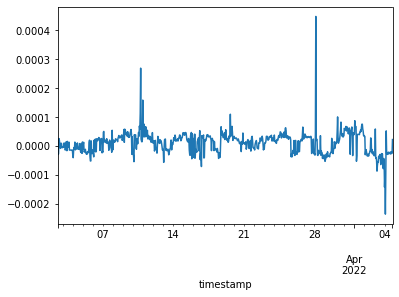

In [890]:
df_insample.max_yield.plot()
#quick graph to see what sort of yield we could try to capture

Below is a class I created to define an inventory with long and short asset, with a backtesting framework that keeps track of exposure, pnl and compounded capital.

In [891]:
class basis_market_inventory(object):
    def __init__(self, starting_capital):
        self.capital=starting_capital
        self.pair=None
        self.delta_side=None        
        self.trade=0
        self.long_exposure=0
        self.long_exchange=None
        self.long_financing=0
        self.long_pnl=0
        self.short_exposure=0
        self.short_exchange=None
        self.short_financing=0
        self.short_pnl=0
        self.pnl=0
        self.compounded_capital=self.capital
        self.funding_spread=0
        self.funding_spread_achieved=0
        self.status=None
        
    def update_inventory_on_signal(self, pair, yield_target, timestamp):
        #once we get a signal to switch pairs, we first identify on which exchange to buy/sell
        self.pair=pair
        if yield_target >0:
             #if yield is positive, FTX is higher than Mango, therefore shorts FTX and longs Mango
             self.long_exchange='mango'
             self.long_financing=df_combined.loc[timestamp].funding_rate_normalized[pair].mango
             self.short_exchange='ftx'
             self.short_financing=df_combined.loc[timestamp].funding_rate_normalized[pair].ftx
             self.delta_side='short'
        elif yield_target <0:
             #if yield is negative, FTX is lower than Mango, therefore shorts Mango and longs FTX
             self.long_exchange='ftx'
             self.long_financing=df_combined.loc[timestamp].funding_rate_normalized[pair].ftx
             self.short_exchange='mango'
             self.short_financing=df_combined.loc[timestamp].funding_rate_normalized[pair].mango
             self.delta_side='long'
        if self.status is None:
            self.trade=1
            #1 deltra-neutral trade to deploy the capital
        else:
            self.trade=2
            #1 deltra-neutral trade to deinvest from the first pair and another 1 to invest in the new pair
        self.long_pnl=0
        self.short_pnl=0
        self.pnl=0
        #We take half the compounded capital to invest in each leg
        self.long_exposure=self.compounded_capital*0.5
        self.short_exposure=-self.compounded_capital*0.5
        self.status='in_position'

    def update_funding_inventory(self, timestamp, df_data):
        #update with the funding rate
        self.trade=0
        self.long_financing=df_combined.loc[timestamp].funding_rate_normalized[self.pair][self.long_exchange]
        self.short_financing=df_combined.loc[timestamp].funding_rate_normalized[self.pair][self.short_exchange]
        self.funding_spread=df_data.loc[timestamp][self.pair]
        self.funding_spread_achieved=(self.long_financing-self.short_financing)*-1 if self.delta_side == 'short' else (self.short_financing-self.long_financing)
          
    def compute_pnl(self):   
        self.long_pnl=-(self.long_exposure*self.long_financing)
        self.short_pnl=-(self.short_exposure*self.short_financing)
        self.pnl=self.long_pnl+self.short_pnl
        self.compounded_capital+=self.pnl
    
    def insert_to_position(self, df, timestamp):
        i=len(df)
        df.loc[i+1]=[timestamp,self.pair,
                                                       self.capital,
                                                       self.delta_side,
                                                       self.long_exposure,
                                                       self.short_exposure,
                                                       self.long_exchange,
                                                       self.short_exchange,
                                                       self.long_financing,
                                                       self.short_financing,
                                                       self.long_pnl,
                                                       self.short_pnl,
                                                       self.pnl,
                                                       self.compounded_capital,
                                                       self.funding_spread,
                                                       self.funding_spread_achieved
                                                       ]  
        
    def insert_to_trade(self, df, timestamp):
        i=len(df)
        df.loc[i+1]=[timestamp,self.pair,
                                                       self.trade,
                                                       self.delta_side,
                                                       self.long_exposure,
                                                       self.short_exposure,
                                                       self.long_exchange,
                                                       self.short_exchange
                                                       ]          


    def backtest_simple(self, df_data):
        pair_target=None
        yield_target=None
        #creating two dataframes to store positions and trades information
        df_position=pd.DataFrame([], columns=['timestamp','pair','capital','delta_side','long_exposure','short_exposure','long_exchange','short_exchange','long_financing','short_financing','long_pnl','short_pnl','pnl','compounded_capital','funding_spread','funding_spread_achieved'])
        df_trade=pd.DataFrame([], columns=['timestamp','pair','trade','delta_side','long_exposure','short_exposure','long_exchange','short_exchange'])
        for index, rows in df_data.iterrows():
            timestamp=index
            if index == df_data.tail(1).index:
                print('Backtesting completed..')
            else:
                #iterate on the sample data
                if self.status is None:
                    #if first observation
                    if pair_target is None:
                        #initialize first observation
                        pair_target = rows.max_yield_pair
                        yield_target = rows.max_yield
                        #update inventory position with our first signal
                        self.update_inventory_on_signal(pair_target, yield_target, timestamp)
                        #update the funding information with the closing hour
                        self.update_funding_inventory(timestamp+datetime.timedelta(hours=1), df_data)
                        #calculate pnl
                        self.compute_pnl()
                        self.insert_to_trade(df_trade, timestamp)
                        #insert into the position table as of the close of the hour
                        self.insert_to_position(df_position, timestamp+datetime.timedelta(hours=1))
                elif self.status is not None:
                    if self.status == 'in_position' and rows.max_yield_pair == pair_target:
                        #same pair, but check if the funding has not flipped
                        if (np.sign(rows.max_yield) == np.sign(yield_target)) == True:               
                            #funding spread has not flipped, update funding rate
                            self.update_funding_inventory(timestamp+datetime.timedelta(hours=1), df_data)
                            #calculate pnl
                            self.compute_pnl()
                            self.insert_to_position(df_position, timestamp+datetime.timedelta(hours=1))
                        else:
                            #if funding has flipped, store new yield target
                            yield_target = rows.max_yield 
                            #we update the funding rate with the pair we already have been invested in.
                            self.update_funding_inventory(timestamp+datetime.timedelta(hours=1), df_data)
                            self.compute_pnl()
                            self.insert_to_position(df_position, timestamp+datetime.timedelta(hours=1))
                            #Invest in the new pair and wait the next hour to get the new funding rates
                            self.update_inventory_on_signal(pair_target, yield_target, timestamp)
                            self.insert_to_trade(df_trade, timestamp)              
                    elif self.status == 'in_position' and rows.max_yield_pair != inventory.pair:
                        pair_target = rows.max_yield_pair
                        yield_target = rows.max_yield            
                        #new target
                        #keep invested until the end of the hour
                        self.update_funding_inventory(timestamp+datetime.timedelta(hours=1), df_data)
                        self.compute_pnl()
                        self.insert_to_position(df_position, timestamp+datetime.timedelta(hours=1))
                        self.update_inventory_on_signal(pair_target, yield_target, timestamp)
                        self.insert_to_trade(df_trade, timestamp)  

        return df_position, df_trade

First, let's take a very aggressive assumption that we can deploy a strategy of USD1mio (500k on each leg) and that we can invest it accross all perps except FTT.

In [892]:
inventory=basis_market_inventory(1e6)
df_res_position, df_res_trade=inventory.backtest_simple(df_insample)

Backtesting completed..


In [893]:
#adding execution costs
df_res_trade['cost_2pm']=df_res_trade.apply(lambda x: x.trade*(2/1e6 * (x.long_exposure+abs(x.short_exposure))),axis=1)
df_res_trade['cost_5pm']=df_res_trade.apply(lambda x: x.trade*(5/1e6 * (x.long_exposure + abs(x.short_exposure))),axis=1)
df_res_trade['cost_10pm']=df_res_trade.apply(lambda x: x.trade*(10/1e6 * (x.long_exposure + abs(x.short_exposure))),axis=1)
df_res_trade['cost_25pm']=df_res_trade.apply(lambda x: x.trade*(25/1e6 * (x.long_exposure + abs(x.short_exposure))),axis=1)

df_results_insample=df_res_position.merge(df_res_trade[['timestamp','cost_2pm','cost_5pm','cost_10pm','cost_25pm']], how='outer', on='timestamp').fillna(0)
df_results_insample['net_pnl_2pm']=df_results_insample['pnl']-df_results_insample['cost_2pm']
df_results_insample['net_pnl_5pm']=df_results_insample['pnl']-df_results_insample['cost_5pm']
df_results_insample['net_pnl_10pm']=df_results_insample['pnl']-df_results_insample['cost_10pm']
df_results_insample['net_pnl_25pm']=df_results_insample['pnl']-df_results_insample['cost_25pm']

In [894]:
#df_results
print('Total PnL:{:,.0f} Yield: {:,.2%} Trades: {:,.0f}'.format(df_results_insample.pnl.sum(), (inventory.compounded_capital/inventory.capital)-1,df_res_trade.trade.sum()))
fig = px.line(df_results_insample.groupby(['timestamp']).agg({'pnl':'sum','net_pnl_2pm':'sum','net_pnl_5pm':'sum','net_pnl_10pm':'sum','net_pnl_25pm':'sum'}).cumsum())
fig.show()
#1 trade: 1 delta-neutral trade (buy and short same perp)


Total PnL:8,137 Yield: 0.81% Trades: 580


The yield extracted is slightly above 0.8% on our in-sample data (without leverage), and it will be extractable on the basis of how effective the execution will be. I don't know exactly how much it would cost to passively deploy the capital, but in FX, the spread cost on most highly liquid pairs (**on an aggressive order**) is roughtly between 10 and 30 dollar per mio.<br>
I assume on BTC and ETH, this will be a lot higher. Looking at the order book on FTX, I can see spreads going for 20 to 30 pts for 25 bitcoin. This is already more than 200 dollar per mio traded.

**Let's have a look at the yield we have been able to capture with the strategy.**

In [895]:
funding_captured=df_funding_spread.merge(df_results_insample[['timestamp','funding_spread_achieved']].drop_duplicates(['timestamp'],keep='last'), how='inner', left_on='timestamp',right_on='timestamp')
funding_captured.drop('FTT-PERP', axis=1, inplace=True)
funding_captured=funding_captured.set_index('timestamp')
funding_captured

BTC-PERP   ETH-PERP  LUNA-PERP   SOL-PERP  \
timestamp                                                         
2022-03-02 12:00:00  0.0000072  0.0000101 -0.0000175  0.0000006   
2022-03-02 13:00:00  0.0000037  0.0000054 -0.0000296 -0.0000076   
2022-03-02 14:00:00  0.0000093 -0.0000029 -0.0000277  0.0000024   
2022-03-02 15:00:00  0.0000251  0.0000145 -0.0000124  0.0000107   
2022-03-02 16:00:00  0.0000189  0.0000093 -0.0000114 -0.0000022   
...                        ...        ...        ...        ...   
2022-04-04 15:00:00 -0.0000158 -0.0000284 -0.0000086 -0.0000271   
2022-04-04 16:00:00 -0.0000215 -0.0000210  0.0000124 -0.0000065   
2022-04-04 17:00:00 -0.0000167 -0.0000209  0.0000013 -0.0000016   
2022-04-04 18:00:00 -0.0000215 -0.0000257  0.0000009  0.0000034   
2022-04-04 19:00:00 -0.0000060 -0.0000168  0.0000218  0.0000113   

                     funding_spread_achieved  
timestamp                                     
2022-03-02 12:00:00                0.0000000  
2022-03-02 13:00:00                0.0000296  
2022-03-02 14:00:00                0.0000277  
2022-03-02 15:00:00                0.0000124  
2022-03-02 16:00:00                0.0000114  
...                                      ...  
2022-04-04 15:00:00                0.0000284  
2022-04-04 16:00:00                0.0000210  
2022-04-04 17:00:00                0.0000209  
2022-04-04 18:00:00                0.0000215  
2022-04-04 19:00:00                0.0000168  

[800 rows x 5 columns]

In [896]:
fig = px.line(funding_captured.fillna(0))
fig.show()

The strategy is able to capture most the spikes in funding spreads. However, we also capture quite a lot of signal noise as we saw previously. Therefore, we could potentially calibrate the strategy to reduce the shift in asset deployment by staying longer in position.


In [897]:
df_res_trade['avg_time']=df_res_trade.timestamp.diff().shift(-1)
df_res_trade['avg_time']=df_res_trade['avg_time'].dt.total_seconds()/3600
hours_stats=df_res_trade.groupby(['pair']).agg({'avg_time':['mean','sum']})
hours_stats.columns = ["_".join(x) for x in hours_stats.columns.ravel()]  
pnl_stats=df_res_position.groupby(['pair']).agg({'pnl':'sum'})
pnl_stats=pnl_stats.merge(hours_stats, on='pair')
pnl_stats['avg_pnl_hour']=pnl_stats.pnl/pnl_stats.avg_time_sum
pnl_stats

pnl  avg_time_mean  avg_time_sum  avg_pnl_hour
pair                                                              
BTC-PERP  1,962.2692473      2.7000000   189.0000000    10.3823770
ETH-PERP    683.6448208      2.0204082    99.0000000     6.9055032
LUNA-PERP 1,970.3654795      2.6382979   248.0000000     7.9450221
SOL-PERP  3,520.8939959      3.3896104   261.0000000    13.4900153

The results show that we are on average invested between 2 and 3 hours. This is likely to low and will not be scalable.<br>
We could look at tweaking the strategy to stay invested during a longer period (we could use the average time we calculated previously) and trigger a signal when the funding spread reaches 1 standard deviation, which should reduce the signal noise we could encounter when looking the highest yielding pair.<br>


Now let's run the same strategy with our out-sample data.

In [898]:
df_outsample.drop('FTT-PERP', axis=1, inplace=True)
df_outsample_abs=df_outsample.abs().copy()
df_outsample_abs['max_yield_pair'] = df_outsample_abs.eq(df_outsample_abs.max(axis=1), axis=0).apply(lambda x: ', '.join(df_outsample_abs.columns[x]), axis=1)
df_outsample['max_yield_pair']=df_outsample_abs.max_yield_pair
df_outsample['max_yield']=df_outsample.apply(lambda x: x[x.max_yield_pair],axis=1)
inventory=basis_market_inventory(1e6)
df_res_position, df_res_trade=inventory.backtest_simple(df_outsample)

#adding execution costs
df_res_trade['cost_2pm']=df_res_trade.apply(lambda x: x.trade*(2/1e6 * (x.long_exposure+abs(x.short_exposure))),axis=1)
df_res_trade['cost_5pm']=df_res_trade.apply(lambda x: x.trade*(5/1e6 * (x.long_exposure + abs(x.short_exposure))),axis=1)
df_res_trade['cost_10pm']=df_res_trade.apply(lambda x: x.trade*(10/1e6 * (x.long_exposure + abs(x.short_exposure))),axis=1)
df_res_trade['cost_25pm']=df_res_trade.apply(lambda x: x.trade*(25/1e6 * (x.long_exposure + abs(x.short_exposure))),axis=1)

df_results_outsample=df_res_position.merge(df_res_trade[['timestamp','cost_2pm','cost_5pm','cost_10pm','cost_25pm']], how='outer', on='timestamp').fillna(0)
df_results_outsample['net_pnl_2pm']=df_results_outsample['pnl']-df_results_outsample['cost_2pm']
df_results_outsample['net_pnl_5pm']=df_results_outsample['pnl']-df_results_outsample['cost_5pm']
df_results_outsample['net_pnl_10pm']=df_results_outsample['pnl']-df_results_outsample['cost_10pm']
df_results_outsample['net_pnl_25pm']=df_results_outsample['pnl']-df_results_outsample['cost_25pm']

print('Total PnL:{:,.0f} Yield: {:,.2%} Trades: {:,.0f}'.format(df_results_outsample.pnl.sum(), (inventory.compounded_capital/inventory.capital)-1,df_res_trade.trade.sum()))
fig = px.line(df_results_outsample.groupby(['timestamp']).agg({'pnl':'sum','net_pnl_2pm':'sum','net_pnl_5pm':'sum','net_pnl_10pm':'sum','net_pnl_25pm':'sum'}).cumsum())
fig.show()

Backtesting completed..
Total PnL:10,397 Yield: 1.04% Trades: 178


In [899]:
funding_captured=df_funding_spread.merge(df_results_outsample[['timestamp','funding_spread_achieved']].drop_duplicates(['timestamp'],keep='last'), how='inner', left_on='timestamp',right_on='timestamp')
funding_captured.drop('FTT-PERP', axis=1, inplace=True)
funding_captured=funding_captured.set_index('timestamp')
fig = px.line(funding_captured.fillna(0))
fig.show()

In [900]:
df_res_trade['avg_time']=df_res_trade.timestamp.diff().shift(-1)
df_res_trade['avg_time']=df_res_trade['avg_time'].dt.total_seconds()/3600
hours_stats=df_res_trade.groupby(['pair']).agg({'avg_time':['mean','sum']})
hours_stats.columns = ["_".join(x) for x in hours_stats.columns.ravel()]  
pnl_stats=df_res_position.groupby(['pair']).agg({'pnl':'sum'})
pnl_stats=pnl_stats.merge(hours_stats, on='pair')
pnl_stats['avg_pnl_hour']=pnl_stats.pnl/pnl_stats.avg_time_sum
pnl_stats

pnl  avg_time_mean  avg_time_sum  avg_pnl_hour
pair                                                              
BTC-PERP    623.9409552      2.6428571    37.0000000    16.8632691
ETH-PERP    352.1097802      2.1538462    28.0000000    12.5753493
LUNA-PERP 6,388.6693239      5.4722222   197.0000000    32.4297935
SOL-PERP  3,032.3820055      3.3846154    88.0000000    34.4588864

Based on the results, we can assume that it would not be that realistic to deploy the 1mio USD for most perps on Mango. Indeed, with average hourly volume at 300k for BTC, 150k on ETH and LUNA, it means the strategy would trade more than twice the amount of existing volume currently trading, thus impacting the funding rate.<br>
To make the strategy more realistic, it would be necessary to either:
1. deploy a lot less capital on the same instruments, using for instance up to 30% of current average hourly volume, which would be 50k. This would mean 10 times less PnL than the current results. 
2. tweak the first strategy to stay invested longer to reduce cost of execution.
3. deploy more capital to a strategy only investing in SOL as hourly volume are at around 1mio USD on average. 


In [901]:
df_sol=df_funding_spread[['SOL-PERP']].copy()
df_sol=df_sol.resample('1H').first().fillna(method='ffill')
df_sol['max_yield_pair']='SOL-PERP'
df_sol['max_yield']=df_sol['SOL-PERP']
inventory=basis_market_inventory(1e6)
df_res_position, df_res_trade=inventory.backtest_simple(df_sol)
pnl=df_res_position[['long_pnl','short_pnl']].sum().sum()
print('Total PnL:{:,.0f} Yield: {:,.2%}'.format(pnl, (inventory.compounded_capital/inventory.capital)-1))

df_res_trade['cost_2pm']=df_res_trade.apply(lambda x: x.trade*(2/1e6 * (x.long_exposure+abs(x.short_exposure))),axis=1)
df_res_trade['cost_5pm']=df_res_trade.apply(lambda x: x.trade*(5/1e6 * (x.long_exposure + abs(x.short_exposure))),axis=1)
df_res_trade['cost_10pm']=df_res_trade.apply(lambda x: x.trade*(10/1e6 * (x.long_exposure + abs(x.short_exposure))),axis=1)
df_res_trade['cost_25pm']=df_res_trade.apply(lambda x: x.trade*(25/1e6 * (x.long_exposure + abs(x.short_exposure))),axis=1)

df_results_sol=df_res_position.merge(df_res_trade[['timestamp','cost_2pm','cost_5pm','cost_10pm','cost_25pm']], how='outer', on='timestamp').fillna(0)
df_results_sol['net_pnl_2pm']=df_results_sol['pnl']-df_results_sol['cost_2pm']
df_results_sol['net_pnl_5pm']=df_results_sol['pnl']-df_results_sol['cost_5pm']
df_results_sol['net_pnl_10pm']=df_results_sol['pnl']-df_results_sol['cost_10pm']
df_results_sol['net_pnl_25pm']=df_results_sol['pnl']-df_results_sol['cost_25pm']

fig = px.line(df_results_sol.groupby(['timestamp']).agg({'pnl':'sum','net_pnl_2pm':'sum','net_pnl_5pm':'sum','net_pnl_10pm':'sum','net_pnl_25pm':'sum'}).cumsum())
fig.show()

Backtesting completed..
Total PnL:12,004 Yield: 1.20%


In [902]:
df_res_trade['avg_time']=df_res_trade.timestamp.diff().shift(-1)
df_res_trade['avg_time']=df_res_trade['avg_time'].dt.total_seconds()/3600
hours_stats=df_res_trade.groupby(['pair']).agg({'avg_time':['mean','sum']})
hours_stats.columns = ["_".join(x) for x in hours_stats.columns.ravel()]  
pnl_stats=df_res_position.groupby(['pair']).agg({'pnl':'sum'})
pnl_stats=pnl_stats.merge(hours_stats, on='pair')
pnl_stats['avg_pnl_hour']=pnl_stats.pnl/pnl_stats.avg_time_sum
pnl_stats

pnl  avg_time_mean  avg_time_sum  avg_pnl_hour
pair                                                              
SOL-PERP 12,003.9604990      7.5821918 1,107.0000000    10.8436861

In [903]:
#number of days in the data
nb_days=df_data.index.strftime('%Y-%m-%d').unique().value_counts().sum()
print('total days: {}'.format(nb_days))

df_results_sol['tradedate']=pd.to_datetime(df_results_sol.timestamp).dt.strftime('%Y-%m-%d')
stat_sol=df_results_sol.groupby('tradedate').agg({'pnl':'sum','net_pnl_2pm':'sum','net_pnl_5pm':'sum','net_pnl_10pm':'sum','net_pnl_25pm':'sum','compounded_capital':'last'})
stat_sol.at[stat_sol.index[0],'compounded_capital']=1e6+stat_sol.pnl.iloc[0]
stat_sol['log_return']=np.log(stat_sol.compounded_capital/stat_sol.compounded_capital.shift())
stat_sol.at[stat_sol.index[0],'log_return']=np.log(stat_sol.compounded_capital.iloc[0]/1e6)
sharpe=stat_sol['log_return'].mean()/stat_sol['log_return'].std()*np.sqrt(365)

#Sol strategy with assumption of 20x leverage
print('SOL Strategy APR on 20x leverage: {:,.2%}'.format((inventory.compounded_capital-inventory.capital)/(inventory.capital/20)*(365/nb_days)))
print('SOL Strategy Sharpe Ratio: {:,.1f}'.format(sharpe))

print('SOL Strategy APR on 20x leverage with 2pm cost: {:,.2%}'.format((stat_sol.net_pnl_2pm.sum())/(inventory.capital/20)*(365/nb_days)))
print('SOL Strategy APR on 20x leverage with 5pm cost: {:,.2%}'.format((stat_sol.net_pnl_5pm.sum())/(inventory.capital/20)*(365/nb_days)))
print('SOL Strategy APR on 20x leverage with 10pm cost: {:,.2%}'.format((stat_sol.net_pnl_10pm.sum())/(inventory.capital/20)*(365/nb_days)))
print('SOL Strategy APR on 20x leverage with 25pm cost: {:,.2%}'.format((stat_sol.net_pnl_25pm.sum())/(inventory.capital/20)*(365/nb_days)))


total days: 49
SOL Strategy APR on 20x leverage: 178.83%
SOL Strategy Sharpe Ratio: 18.4
SOL Strategy APR on 20x leverage with 2pm cost: 170.10%
SOL Strategy APR on 20x leverage with 5pm cost: 157.01%
SOL Strategy APR on 20x leverage with 10pm cost: 135.18%
SOL Strategy APR on 20x leverage with 25pm cost: 69.69%


Let's run the first strategy with all sample data.

In [904]:
df_sample=df_funding_spread.copy()
df_sample.drop('FTT-PERP', axis=1, inplace=True)
df_sample_abs=df_sample.abs().copy()
df_sample_abs['max_yield_pair'] = df_sample_abs.eq(df_sample_abs.max(axis=1), axis=0).apply(lambda x: ', '.join(df_sample_abs.columns[x]), axis=1)
df_sample['max_yield_pair']=df_sample_abs.max_yield_pair
df_sample['max_yield']=df_sample.apply(lambda x: x[x.max_yield_pair],axis=1)
inventory=basis_market_inventory(1e6)
df_res_position, df_res_trade=inventory.backtest_simple(df_sample)
#adding execution costs
df_res_trade['cost_2pm']=df_res_trade.apply(lambda x: x.trade*(2/1e6 * (x.long_exposure+abs(x.short_exposure))),axis=1)
df_res_trade['cost_5pm']=df_res_trade.apply(lambda x: x.trade*(5/1e6 * (x.long_exposure + abs(x.short_exposure))),axis=1)
df_res_trade['cost_10pm']=df_res_trade.apply(lambda x: x.trade*(10/1e6 * (x.long_exposure + abs(x.short_exposure))),axis=1)
df_res_trade['cost_25pm']=df_res_trade.apply(lambda x: x.trade*(25/1e6 * (x.long_exposure + abs(x.short_exposure))),axis=1)

df_results_sample=df_res_position.merge(df_res_trade[['timestamp','cost_2pm','cost_5pm','cost_10pm','cost_25pm']], how='outer', on='timestamp').fillna(0)
df_results_sample['net_pnl_2pm']=df_results_sample['pnl']-df_results_sample['cost_2pm']
df_results_sample['net_pnl_5pm']=df_results_sample['pnl']-df_results_sample['cost_5pm']
df_results_sample['net_pnl_10pm']=df_results_sample['pnl']-df_results_sample['cost_10pm']
df_results_sample['net_pnl_25pm']=df_results_sample['pnl']-df_results_sample['cost_25pm']
print('Total PnL:{:,.0f} Yield: {:,.2%} Trades: {:,.0f}'.format(df_results_sample.pnl.sum(), (inventory.compounded_capital/inventory.capital)-1,df_res_trade.trade.sum()))
fig = px.line(df_results_sample.groupby(['timestamp']).agg({'pnl':'sum','net_pnl_2pm':'sum','net_pnl_5pm':'sum','net_pnl_10pm':'sum','net_pnl_25pm':'sum'}).cumsum())
fig.show()

Backtesting completed..
Total PnL:18,627 Yield: 1.86% Trades: 760


In [905]:
df_results_sample['tradedate']=pd.to_datetime(df_results_sample.timestamp).dt.strftime('%Y-%m-%d')
stat_sample=df_results_sample.groupby('tradedate').agg({'pnl':'sum','net_pnl_2pm':'sum','net_pnl_5pm':'sum','net_pnl_10pm':'sum','net_pnl_25pm':'sum','compounded_capital':'last'})
stat_sample.at[stat_sample.index[0],'compounded_capital']=1e6+stat_sample.pnl.iloc[0]
stat_sample['log_return']=np.log(stat_sample.compounded_capital/stat_sample.compounded_capital.shift())
stat_sample.at[stat_sample.index[0],'log_return']=np.log(stat_sample.compounded_capital.iloc[0]/1e6)
sharpe=stat_sample['log_return'].mean()/stat_sample['log_return'].std()*np.sqrt(365)

#Strategy with assumption of 20x leverage
print('Strategy APR on 20x leverage: {:,.2%}'.format((inventory.compounded_capital-inventory.capital)/(inventory.capital/20)*(365/nb_days)))
print('Strategy Sharpe Ratio: {:,.1f}'.format(sharpe))

print('Strategy APR on 20x leverage with 2pm cost: {:,.2%}'.format((stat_sample.net_pnl_2pm.sum())/(inventory.capital/20)*(365/nb_days)))
print('Strategy APR on 20x leverage with 5pm cost: {:,.2%}'.format((stat_sample.net_pnl_5pm.sum())/(inventory.capital/20)*(365/nb_days)))
print('Strategy APR on 20x leverage with 10pm cost: {:,.2%}'.format((stat_sample.net_pnl_10pm.sum())/(inventory.capital/20)*(365/nb_days)))
print('Strategy APR on 20x leverage with 25pm cost: {:,.2%}'.format((stat_sample.net_pnl_25pm.sum())/(inventory.capital/20)*(365/nb_days)))


Strategy APR on 20x leverage: 277.50%
Strategy Sharpe Ratio: 25.1
Strategy APR on 20x leverage with 2pm cost: 254.73%
Strategy APR on 20x leverage with 5pm cost: 220.58%
Strategy APR on 20x leverage with 10pm cost: 163.66%
Strategy APR on 20x leverage with 25pm cost: -7.09%


In conclusion, a realistic and  deltra-neutral strategy needs to be deployed on two or more exchanges where the instruments have enough deep liquidity and volume, this is essential for the strategy to avoid skewing the yield against it and not having the ability to deploy capital efficiently without sustaining elevated cost on the execution side.<br>
Based on our study, we could see that we could probably achieve almost 1.9% yield over 50 days (160% APR with an assumption of paying 10USD per mio traded and using a 20x leverage) with a very aggressive approach on both levels (perps with low liquidity/low estimated execution cost).<br>
We also have taken into consideration using the only instrument, SOLANA, which had the most realistic feature to setup a scalable delta-neutral strategy (large OI and highest hourly average volume). Such as strategy could yield around 130% APR based on a 20x leverage and 10USD per mio cost.<br> 
Another avenue for more realistic backtesting would be to emphasize the cost on the most expansive legs, for instance Mango in our study, or to consider deploying capital based on a percentage of the average hourly volume.<br>